In [42]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import glob
import os
import metpy
import metpy.calc as mpcalc
from metpy.units import units
import numpy as np
from datetime import datetime
import xarray as xr
from pint import UnitRegistry
ureg = UnitRegistry()
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import statsmodels.api as sm

In [43]:
# Define file paths
file ="C:\\YEAR1\\NMVOC\\Data\\data_Meteo\\processed_met_11_23.csv"
# Read CSV files
df = pd.read_csv(file)
df

,DATETIME,wind_speed,temperature,relative_humidity,pressure
0,2011-01-18 12:00:00,6.50,4.40,33.65,793.95
1,2011-01-18 13:00:00,7.45,4.45,33.60,793.45
2,2011-01-18 14:00:00,7.25,4.55,32.10,793.10
3,2011-01-18 15:00:00,7.65,4.25,33.40,793.00
4,2011-01-18 16:00:00,8.70,3.50,32.45,793.05
...,...,...,...,...,...
98342,2023-12-31 19:00:00,5.77,4.13,77.00,795.56
98343,2023-12-31 20:00:00,6.08,3.23,88.00,795.59
98344,2023-12-31 21:00:00,6.84,3.22,86.00,795.71
98345,2023-12-31 22:00:00,6.33,3.13,85.00,795.85


In [44]:
# Convert 'DATETIME' column to datetime if not already
df["DATETIME"] = pd.to_datetime(df["DATETIME"])
# helper columns with  hour, month, year
df['hour'] = df['DATETIME'].dt.hour
df['month'] = df['DATETIME'].dt.month
df['year'] = df['DATETIME'].dt.year
df['date'] = df['DATETIME'].dt.date
df['dayofyear'] = df['DATETIME'].dt.date 
df

,DATETIME,wind_speed,temperature,relative_humidity,pressure,hour,month,year,date,dayofyear
0,2011-01-18 12:00:00,6.50,4.40,33.65,793.95,12,1,2011,2011-01-18,2011-01-18
1,2011-01-18 13:00:00,7.45,4.45,33.60,793.45,13,1,2011,2011-01-18,2011-01-18
2,2011-01-18 14:00:00,7.25,4.55,32.10,793.10,14,1,2011,2011-01-18,2011-01-18
3,2011-01-18 15:00:00,7.65,4.25,33.40,793.00,15,1,2011,2011-01-18,2011-01-18
4,2011-01-18 16:00:00,8.70,3.50,32.45,793.05,16,1,2011,2011-01-18,2011-01-18
...,...,...,...,...,...,...,...,...,...,...
98342,2023-12-31 19:00:00,5.77,4.13,77.00,795.56,19,12,2023,2023-12-31,2023-12-31
98343,2023-12-31 20:00:00,6.08,3.23,88.00,795.59,20,12,2023,2023-12-31,2023-12-31
98344,2023-12-31 21:00:00,6.84,3.22,86.00,795.71,21,12,2023,2023-12-31,2023-12-31
98345,2023-12-31 22:00:00,6.33,3.13,85.00,795.85,22,12,2023,2023-12-31,2023-12-31


In [45]:
# Function to determine season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

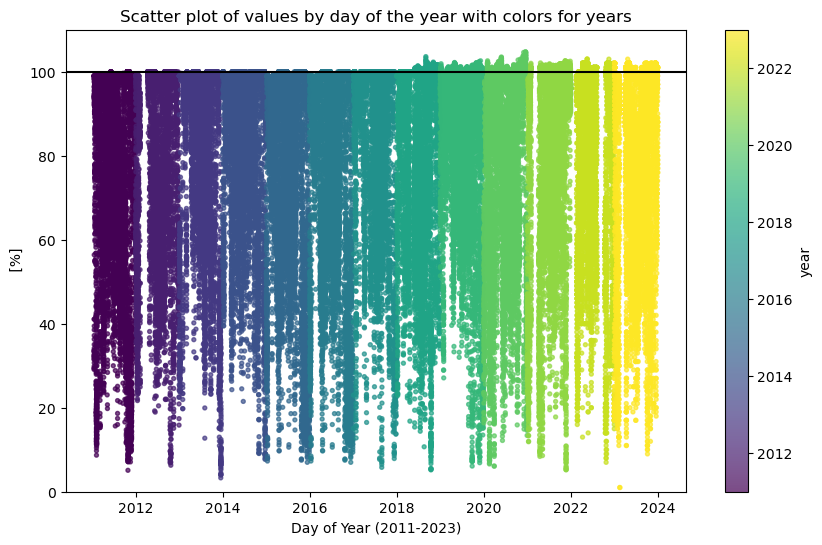

In [46]:
# Set plot style

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['dayofyear'], df['relative_humidity'], c=df['year'], cmap='viridis', alpha=0.7, s=8, marker='o')

# Add color bar to show which color corresponds to which year
plt.colorbar(scatter, label='year')

# Labels and title
plt.ylim(0, 110)
plt.xlabel('Day of Year (2011-2023)')
plt.ylabel(' [%]')
plt.title('Scatter plot of values by day of the year with colors for years')
plt.axhline(100, color="black")
# Show plot
plt.show()

In [7]:
min_RH =df['relative_humidity'].min()
print("rh:", min_RH)

rh: -999.9


In [18]:
max_RH =df['relative_humidity'].max()
print("rh:", max_RH)

rh: 103.5


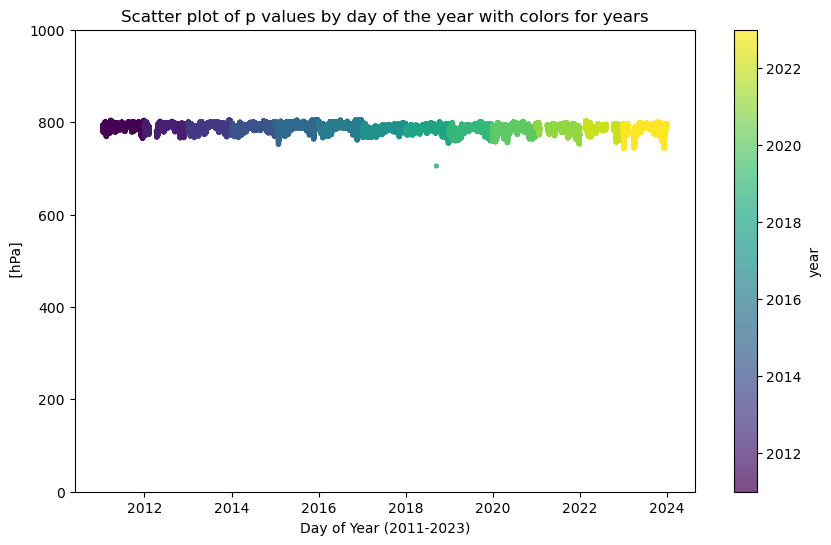

In [47]:
# Set plot style

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['dayofyear'], df['pressure'], c=df['year'], cmap='viridis', alpha=0.7, s=8, marker='o')

# Add color bar to show which color corresponds to which year
plt.colorbar(scatter, label='year')

# Labels and title
plt.ylim(0, 1000)
plt.xlabel('Day of Year (2011-2023)')
plt.ylabel(' [hPa]')
plt.title('Scatter plot of p values by day of the year with colors for years')

# Show plot
plt.show()

In [29]:
df.index = df.DATETIME
df

,DATETIME,wind_speed,temperature,relative_humidity,pressure,hour,month,year,date,dayofyear
DATETIME,,,,,,,,,,
2011-01-18 12:00:00,2011-01-18 12:00:00,6.50,4.40,33.65,793.95,12,1,2011,2011-01-18,2011-01-18
2011-01-18 13:00:00,2011-01-18 13:00:00,7.45,4.45,33.60,793.45,13,1,2011,2011-01-18,2011-01-18
2011-01-18 14:00:00,2011-01-18 14:00:00,7.25,4.55,32.10,793.10,14,1,2011,2011-01-18,2011-01-18
2011-01-18 15:00:00,2011-01-18 15:00:00,7.65,4.25,33.40,793.00,15,1,2011,2011-01-18,2011-01-18
2011-01-18 16:00:00,2011-01-18 16:00:00,8.70,3.50,32.45,793.05,16,1,2011,2011-01-18,2011-01-18
...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,2023-12-31 19:00:00,5.77,-4.27,92.00,776.83,19,12,2023,2023-12-31,2023-12-31
2023-12-31 20:00:00,2023-12-31 20:00:00,6.08,0.72,100.00,777.68,20,12,2023,2023-12-31,2023-12-31
2023-12-31 21:00:00,2023-12-31 21:00:00,6.84,0.10,95.50,778.80,21,12,2023,2023-12-31,2023-12-31


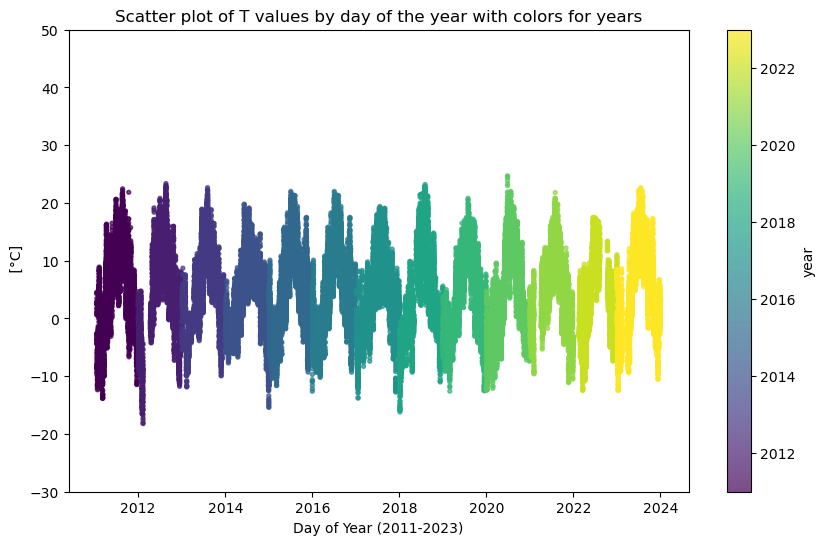

In [48]:
# Set plot style

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['DATETIME'], df['temperature'], c=df['year'], cmap='viridis', alpha=0.7, s=8, marker='o')


# Add color bar to show which color corresponds to which year
plt.colorbar(scatter, label='year')

# Labels and title
plt.ylim(-30, 50)
plt.xlabel('Day of Year (2011-2023)')
plt.ylabel(' [°C]')
plt.title('Scatter plot of T values by day of the year with colors for years')

# Show plot
plt.show()

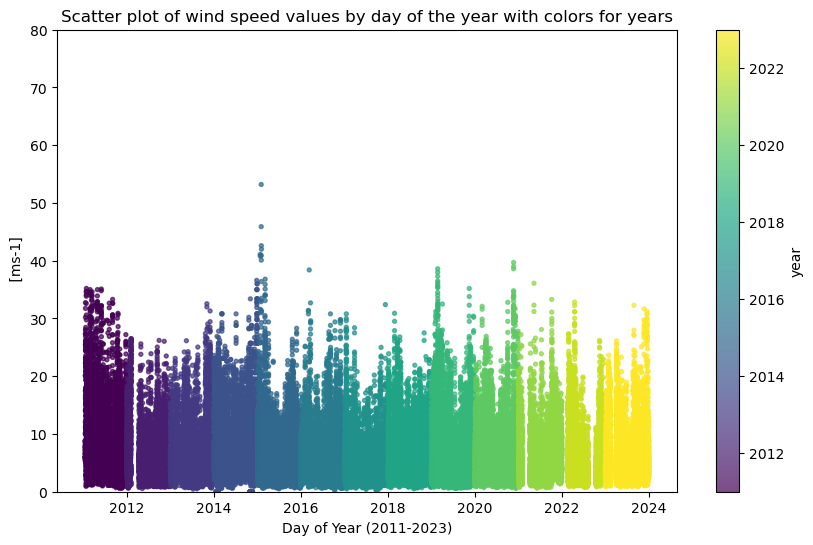

In [50]:
# Set plot style

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['dayofyear'], df['wind_speed'], c=df['year'], cmap='viridis', alpha=0.7, s=8, marker='o')

# Add color bar to show which color corresponds to which year
plt.colorbar(scatter, label='year')

# Labels and title
plt.ylim(0, 80)
plt.xlabel('Day of Year (2011-2023)')
plt.ylabel(' [ms-1]')
plt.title('Scatter plot of wind speed values by day of the year with colors for years')

# Show plot
plt.show()

In [ ]:
#season
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = dict(zip(range(1,13), seasons))
month_to_season 
S=df.starttime_dt.dt.month.map(month_to_season) 
df['season']=S
df

In [ ]:

fig = plt.figure(figsize=(10,6))
(df['wind_s']).plot(color="b", marker="x", linewidth=0)
plt.xlabel('Time')
plt.ylabel(r'[$ms^{-1}$]')
plt.title('Wind speed @ MNC')
plt.show()

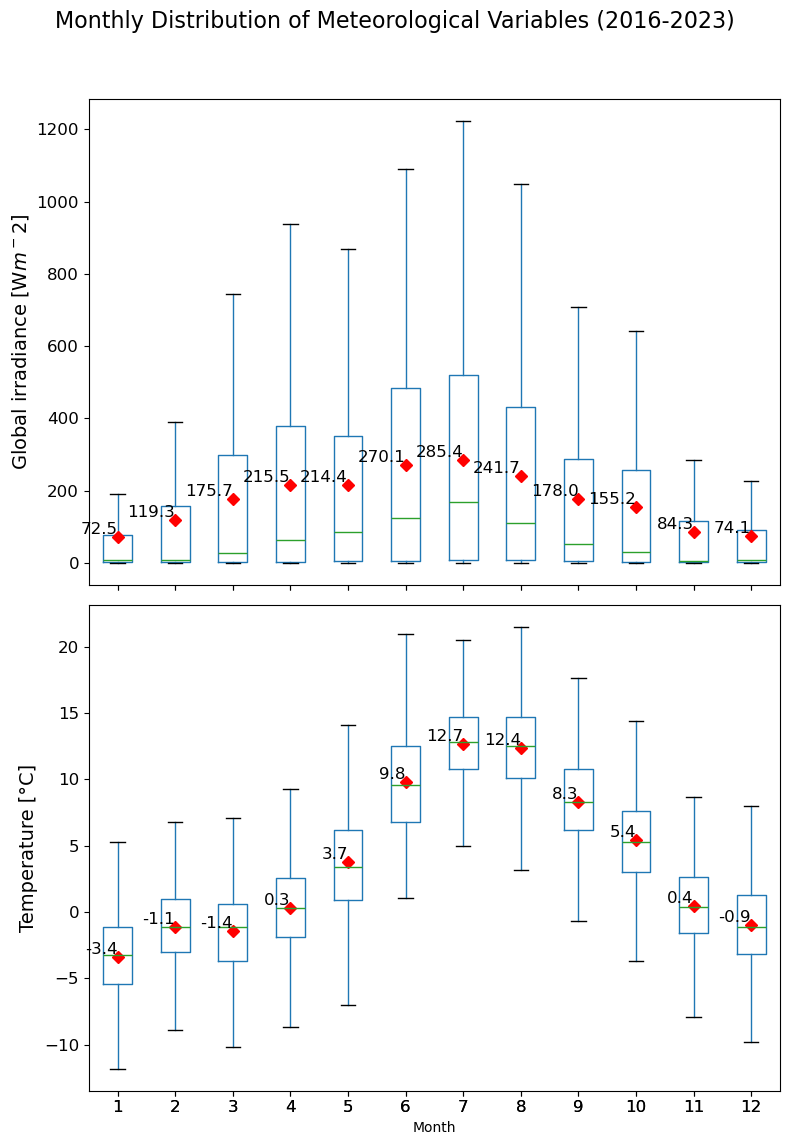

In [15]:
# Initialize the figure with one column and four rows
fig, axes = plt.subplots(2, 1, figsize=(8, 12), sharex=True)

# List of variables and their labels for the plots
variables = ['glob_rad', 'T']
titles = [ 'Global irradiance', 'Temperature']
units= ['[W$m^-2$]', '[°C]']
# Create boxplots for each variable
for i, (var, unit) in enumerate(zip(variables, units)):
      # Calculate the mean for each month
    monthly_means = df.groupby('month')[var].mean()
    
    # Group by month and plot
    df.boxplot(column=var, by='month', ax=axes[i], grid=False, showfliers=False)
    #axes[i].set_title(titles[i])
    axes[i].set_title('')
    axes[i].set_xlabel('')  # Remove x-axis label for clarity
    axes[i].set_ylabel(f'{titles[i]} {unit}', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)
    # Overlay mean values as red diamonds and annotate each mean
    axes[i].plot(monthly_means.index, monthly_means.values, 'rD')  # Red diamond markers
    for month, mean_value in monthly_means.items():
        axes[i].text(month, mean_value, f'{mean_value:.1f}', color='black', ha='right', va='bottom', fontsize=12)

# Add a main title and adjust layout
plt.suptitle("Monthly Distribution of Meteorological Variables (2016-2023)", fontsize=16)
plt.xlabel("Month")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.savefig("C:\\YEAR1\\NMVOC\\code\\figures\\meteo_T_irr.png", dpi=300)
plt.show()

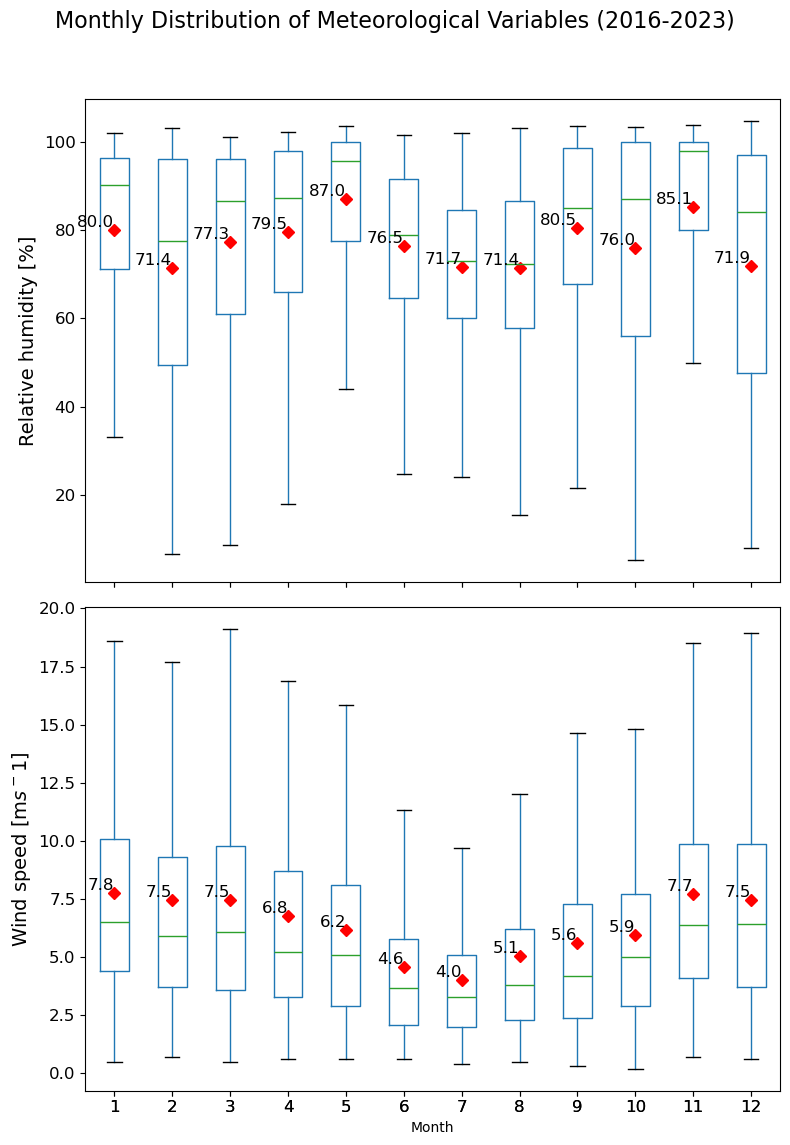

In [18]:
# Initialize the figure with one column and four rows
fig, axes = plt.subplots(2, 1, figsize=(8, 12), sharex=True)

# List of variables and their labels for the plots
variables = ['rH', 'wind_s']
titles = ['Relative humidity', 'Wind speed']
units= ['[%]', '[m$s^-1$]']
# Create boxplots for each variable
for i, (var, unit) in enumerate(zip(variables, units)):
      # Calculate the mean for each month
    monthly_means = df.groupby('month')[var].mean()
    
    # Group by month and plot
    df.boxplot(column=var, by='month', ax=axes[i], grid=False, showfliers=False)
    #axes[i].set_title(titles[i])
    axes[i].set_title('')
    axes[i].set_xlabel('')  # Remove x-axis label for clarity
    axes[i].set_ylabel(f'{titles[i]} {unit}', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)
    # Overlay mean values as red diamonds and annotate each mean
    axes[i].plot(monthly_means.index, monthly_means.values, 'rD')  # Red diamond markers
    for month, mean_value in monthly_means.items():
        axes[i].text(month, mean_value, f'{mean_value:.1f}', color='black', ha='right', va='bottom', fontsize=12)

# Add a main title and adjust layout
plt.suptitle("Monthly Distribution of Meteorological Variables (2016-2023)", fontsize=16)
plt.xlabel("Month")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.savefig("C:\\YEAR1\\NMVOC\\code\\figures\\meteo_rH_WS.png", dpi=300)
plt.show()

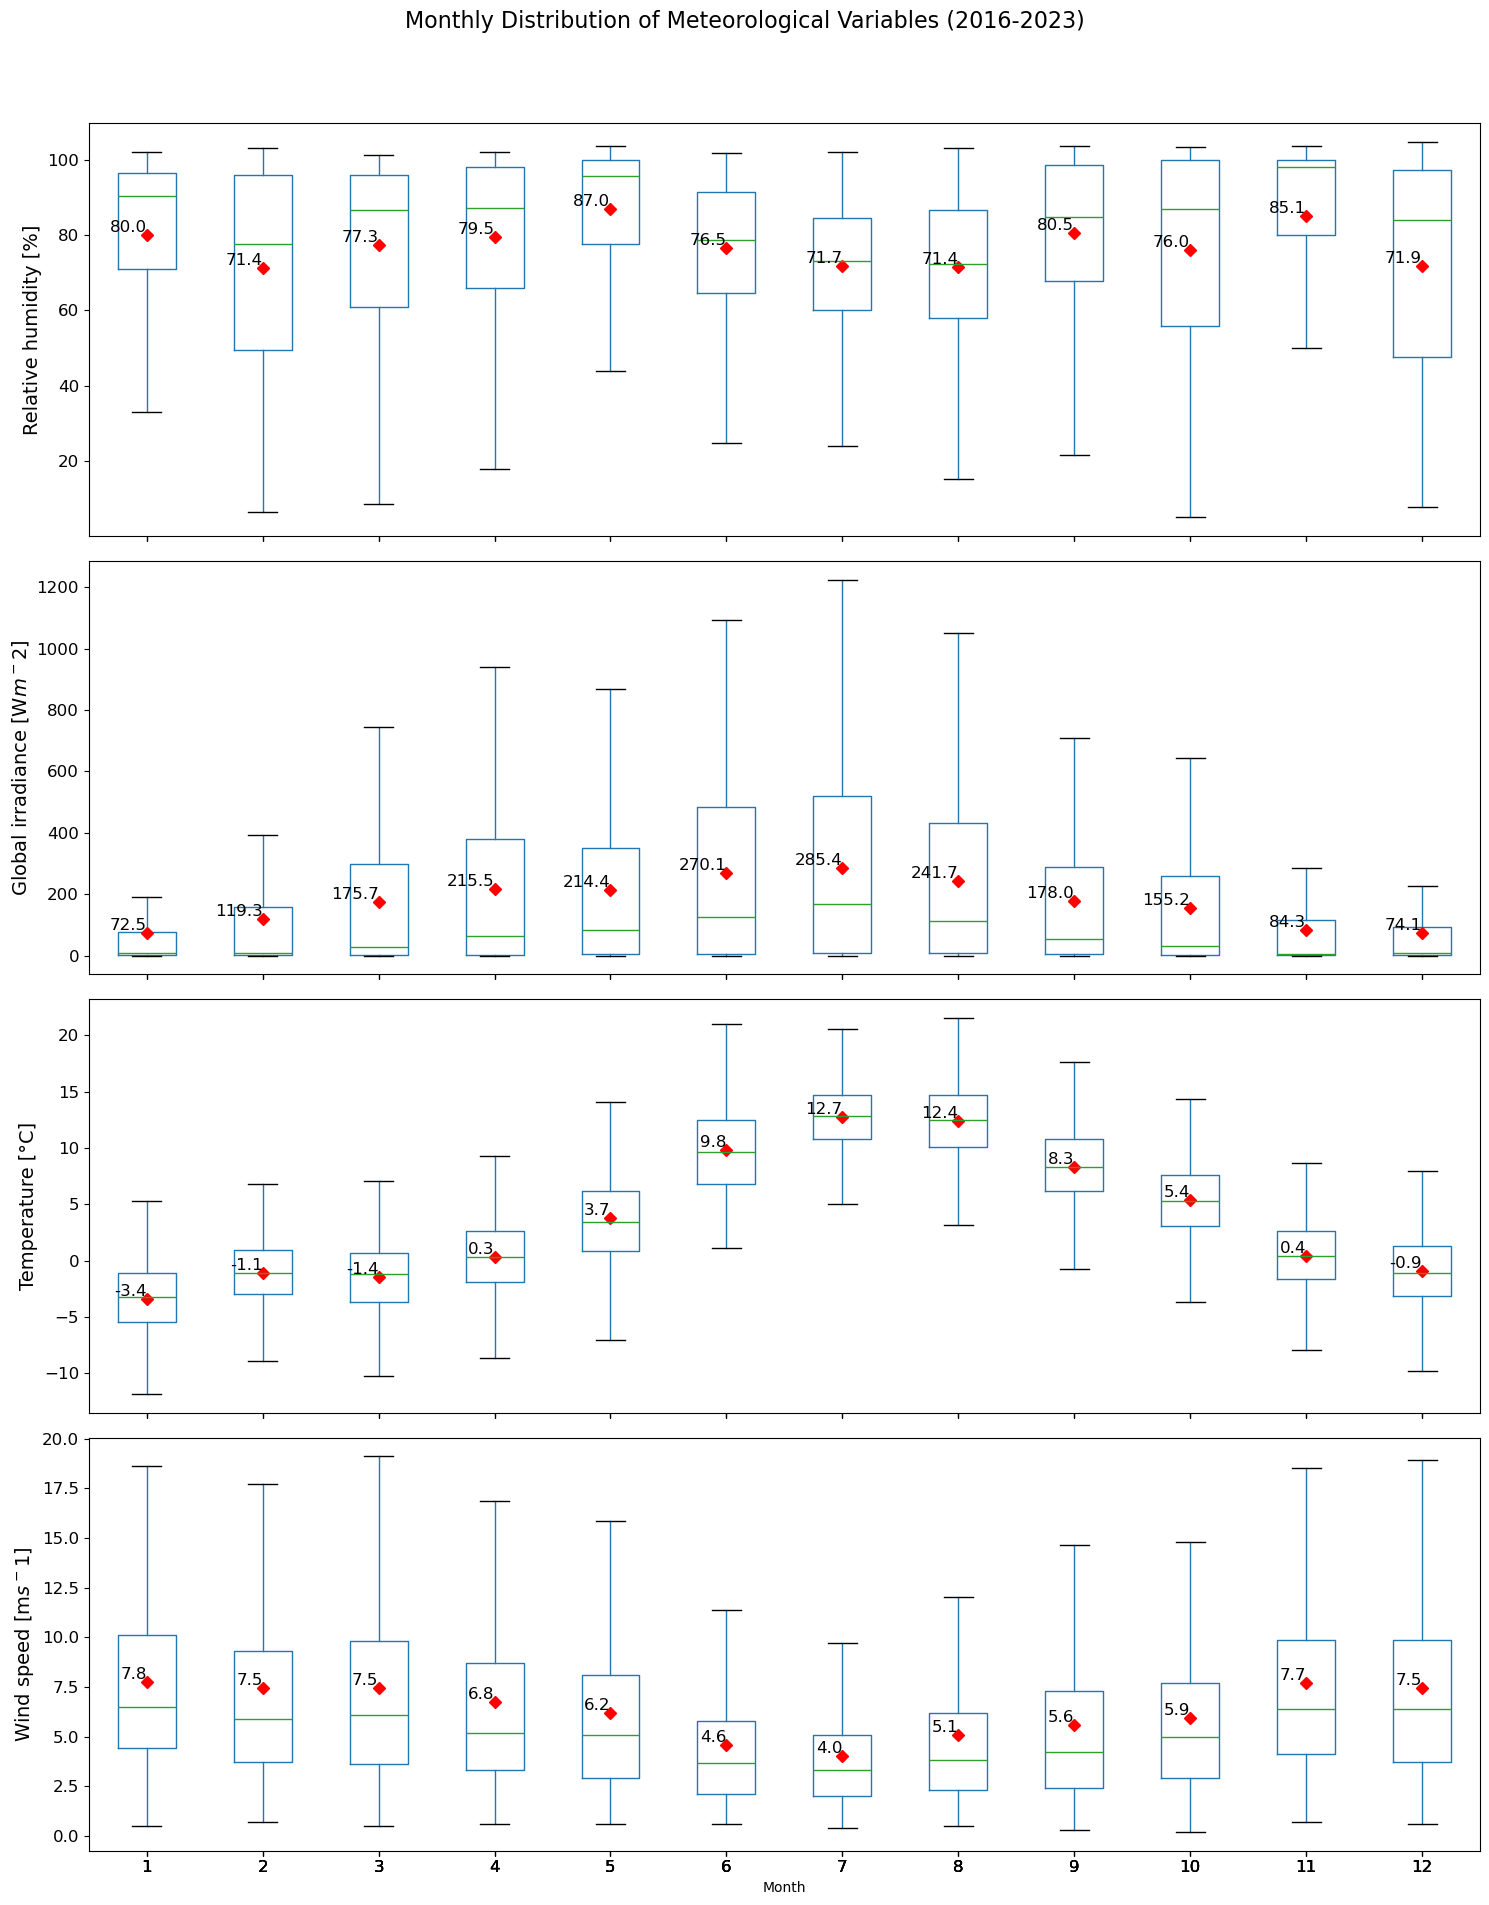

In [132]:
# Initialize the figure with one column and four rows
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# List of variables and their labels for the plots
variables = ['rH', 'glob_rad', 'T','wind_s']
titles = ['Relative humidity', 'Global irradiance', 'Temperature', 'Wind speed']
units=['[%]', '[W$m^-2$]', '[°C]','[m$s^-1$]']
# Create boxplots for each variable
for i, (var, unit) in enumerate(zip(variables, units)):
      # Calculate the mean for each month
    monthly_means = df.groupby('month')[var].mean()
    
    # Group by month and plot
    df.boxplot(column=var, by='month', ax=axes[i], grid=False, showfliers=False)
    #axes[i].set_title(titles[i])
    axes[i].set_title('')
    axes[i].set_xlabel('')  # Remove x-axis label for clarity
    axes[i].set_ylabel(f'{titles[i]} {unit}', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)
    # Overlay mean values as red diamonds and annotate each mean
    axes[i].plot(monthly_means.index, monthly_means.values, 'rD')  # Red diamond markers
    for month, mean_value in monthly_means.items():
        axes[i].text(month, mean_value, f'{mean_value:.1f}', color='black', ha='right', va='bottom', fontsize=12)

# Add a main title and adjust layout
plt.suptitle("Monthly Distribution of Meteorological Variables (2016-2023)", fontsize=16)
plt.xlabel("Month")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.savefig("C:\\YEAR1\\NMVOC\\code\\figures\\meteo_boxplots.png", dpi=300)
plt.show()

In [ ]:
##Anlysis for COVID time

In [20]:
# Define time ranges
time_ranges = {
    '03-09_to_05-04': ('03-09', '05-04'),
    '05-05_to_10-22': ('05-05', '10-22'),
    '10-23_to_12-29': ('10-23', '12-29')
}

# Define year groups
def get_year_group(year):
    if 2016 <= year <= 2019:
        return '2016-2019'
    elif year == 2020:
        return '2020'
    elif 2021 <= year <= 2023:
        return '2021-2023'
    return None

df['Year_Group'] = df['year'].apply(get_year_group)

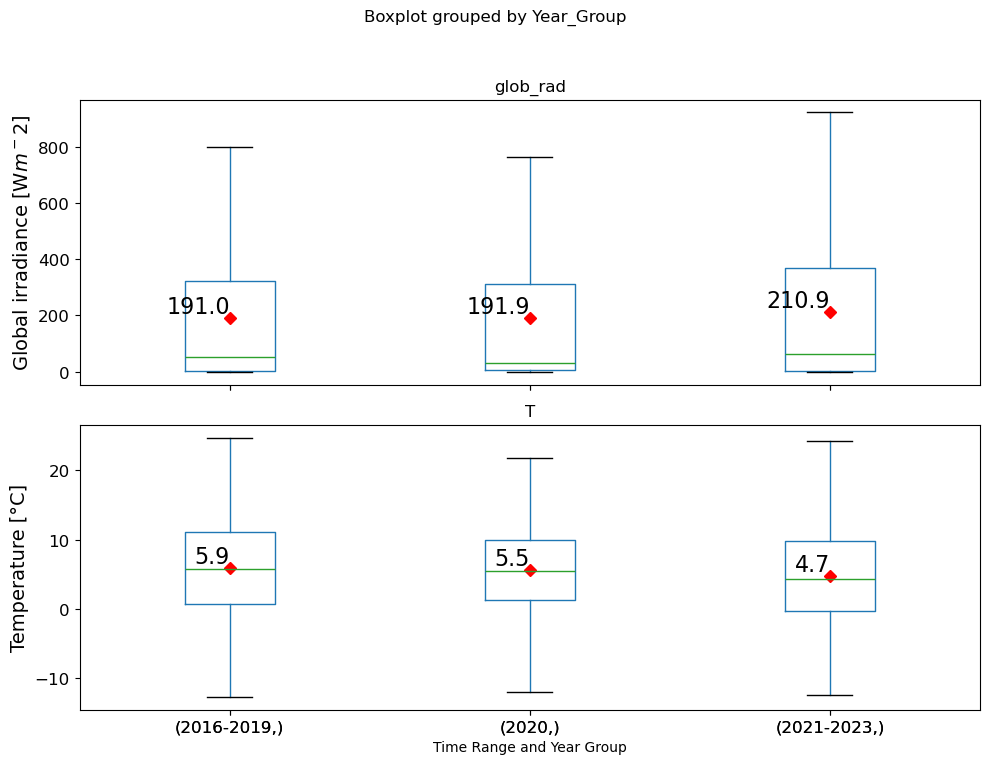

In [46]:
#Meteo conditions during COVID (2020), pre- (2016-2019), and post- COVID  (2021-2023)


# Filter to only include relevant years and ranges
df = df.dropna(subset=['Year_Group'])

# Initialize the figure with one column and four rows
fig, axes = plt.subplots(2, 1, figsize=(10,8), sharex=True)

# List of variables, titles, and respective units
variables = ['glob_rad', 'T']
titles = ['Global irradiance', 'Temperature']
#xlables = ['3/9-5/4 2016-2019', 'I LD 2020', '3/9-5/4 2021-2023', '5/5-10/22 2016-2019', 
          # 'Mild measures 2020', '5/5-10/22 2021-2023','10/23-12/29 2015-2019', 'II LD 2020', '10/23-12/29 2021-2023' ]
units=['[W$m^-2$]', '[°C]']

# Plot boxplots for each variable
for i, (var, unit) in enumerate(zip(variables, units)):
    
    period_means = df.groupby(['Year_Group'])[var].mean()
     # Calculate mean values for each Time_Range and Year_Group combination
    
    # Create boxplot for each time range and year group combination
    df.boxplot(column=var, by=[ 'Year_Group'], ax=axes[i], grid=False, showfliers=False)
    #axes[i].set_title(f"{titles[i]}")
    axes[i].set_ylabel(f"{titles[i]} {unit}", fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)
    axes[i].set_xlabel("")  # Remove x-axis label for clarity

# Overlay mean values as red diamonds and annotate each mean
    for (year_group), mean_value in period_means.items():
        # Get the x-coordinate for each (Time_Range, Year_Group) combination
        x_coord = list(period_means.index).index((year_group)) + 1  # Boxplot positions start at 1
        axes[i].plot(x_coord, mean_value, 'rD')  # Red diamond marker
        axes[i].text(x_coord, mean_value, f'{mean_value:.1f}', color='black', ha='right', va='bottom', fontsize=16)

# Add a main title and adjust layout
#plt.suptitle("Distribution of Meteorological Variables by Custom Time and Year Ranges", fontsize=16)
plt.xlabel("Time Range and Year Group")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.savefig("C:\\YEAR1\\NMVOC\\code\\figures\\meteo_Covid_Year_T_irr.png", dpi=300)
plt.show()

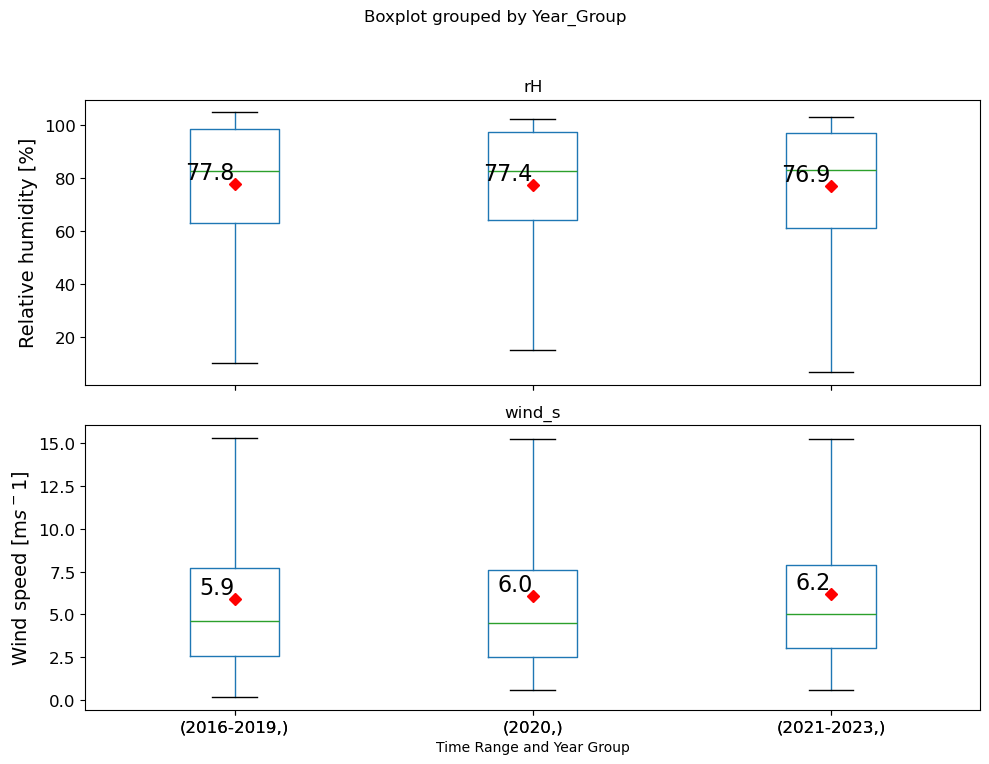

In [48]:
#Meteo conditions during COVID (2020), pre- (2016-2019), and post- COVID  (2021-2023)


# Filter to only include relevant years and ranges
df = df.dropna(subset=['Year_Group'])

# Initialize the figure with one column and four rows
fig, axes = plt.subplots(2, 1, figsize=(10,8), sharex=True)

# List of variables, titles, and respective units
variables = ['rH', 'wind_s']
titles = ['Relative humidity', 'Wind speed']
#xlables = ['3/9-5/4 2016-2019', 'I LD 2020', '3/9-5/4 2021-2023', '5/5-10/22 2016-2019', 
          # 'Mild measures 2020', '5/5-10/22 2021-2023','10/23-12/29 2015-2019', 'II LD 2020', '10/23-12/29 2021-2023' ]
units=['[%]','[m$s^-1$]']

# Plot boxplots for each variable
for i, (var, unit) in enumerate(zip(variables, units)):
    
    period_means = df.groupby(['Year_Group'])[var].mean()
     # Calculate mean values for each Time_Range and Year_Group combination
    
    # Create boxplot for each time range and year group combination
    df.boxplot(column=var, by=[ 'Year_Group'], ax=axes[i], grid=False, showfliers=False)
    #axes[i].set_title(f"{titles[i]}")
    axes[i].set_ylabel(f"{titles[i]} {unit}", fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)
    axes[i].set_xlabel("")  # Remove x-axis label for clarity

# Overlay mean values as red diamonds and annotate each mean
    for (year_group), mean_value in period_means.items():
        # Get the x-coordinate for each (Time_Range, Year_Group) combination
        x_coord = list(period_means.index).index((year_group)) + 1  # Boxplot positions start at 1
        axes[i].plot(x_coord, mean_value, 'rD')  # Red diamond marker
        axes[i].text(x_coord, mean_value, f'{mean_value:.1f}', color='black', ha='right', va='bottom', fontsize=16)

# Add a main title and adjust layout
#plt.suptitle("Distribution of Meteorological Variables by Custom Time and Year Ranges", fontsize=16)
plt.xlabel("Time Range and Year Group")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.savefig("C:\\YEAR1\\NMVOC\\code\\figures\\meteo_Covid_Year_RH_WS.png", dpi=300)
plt.show()

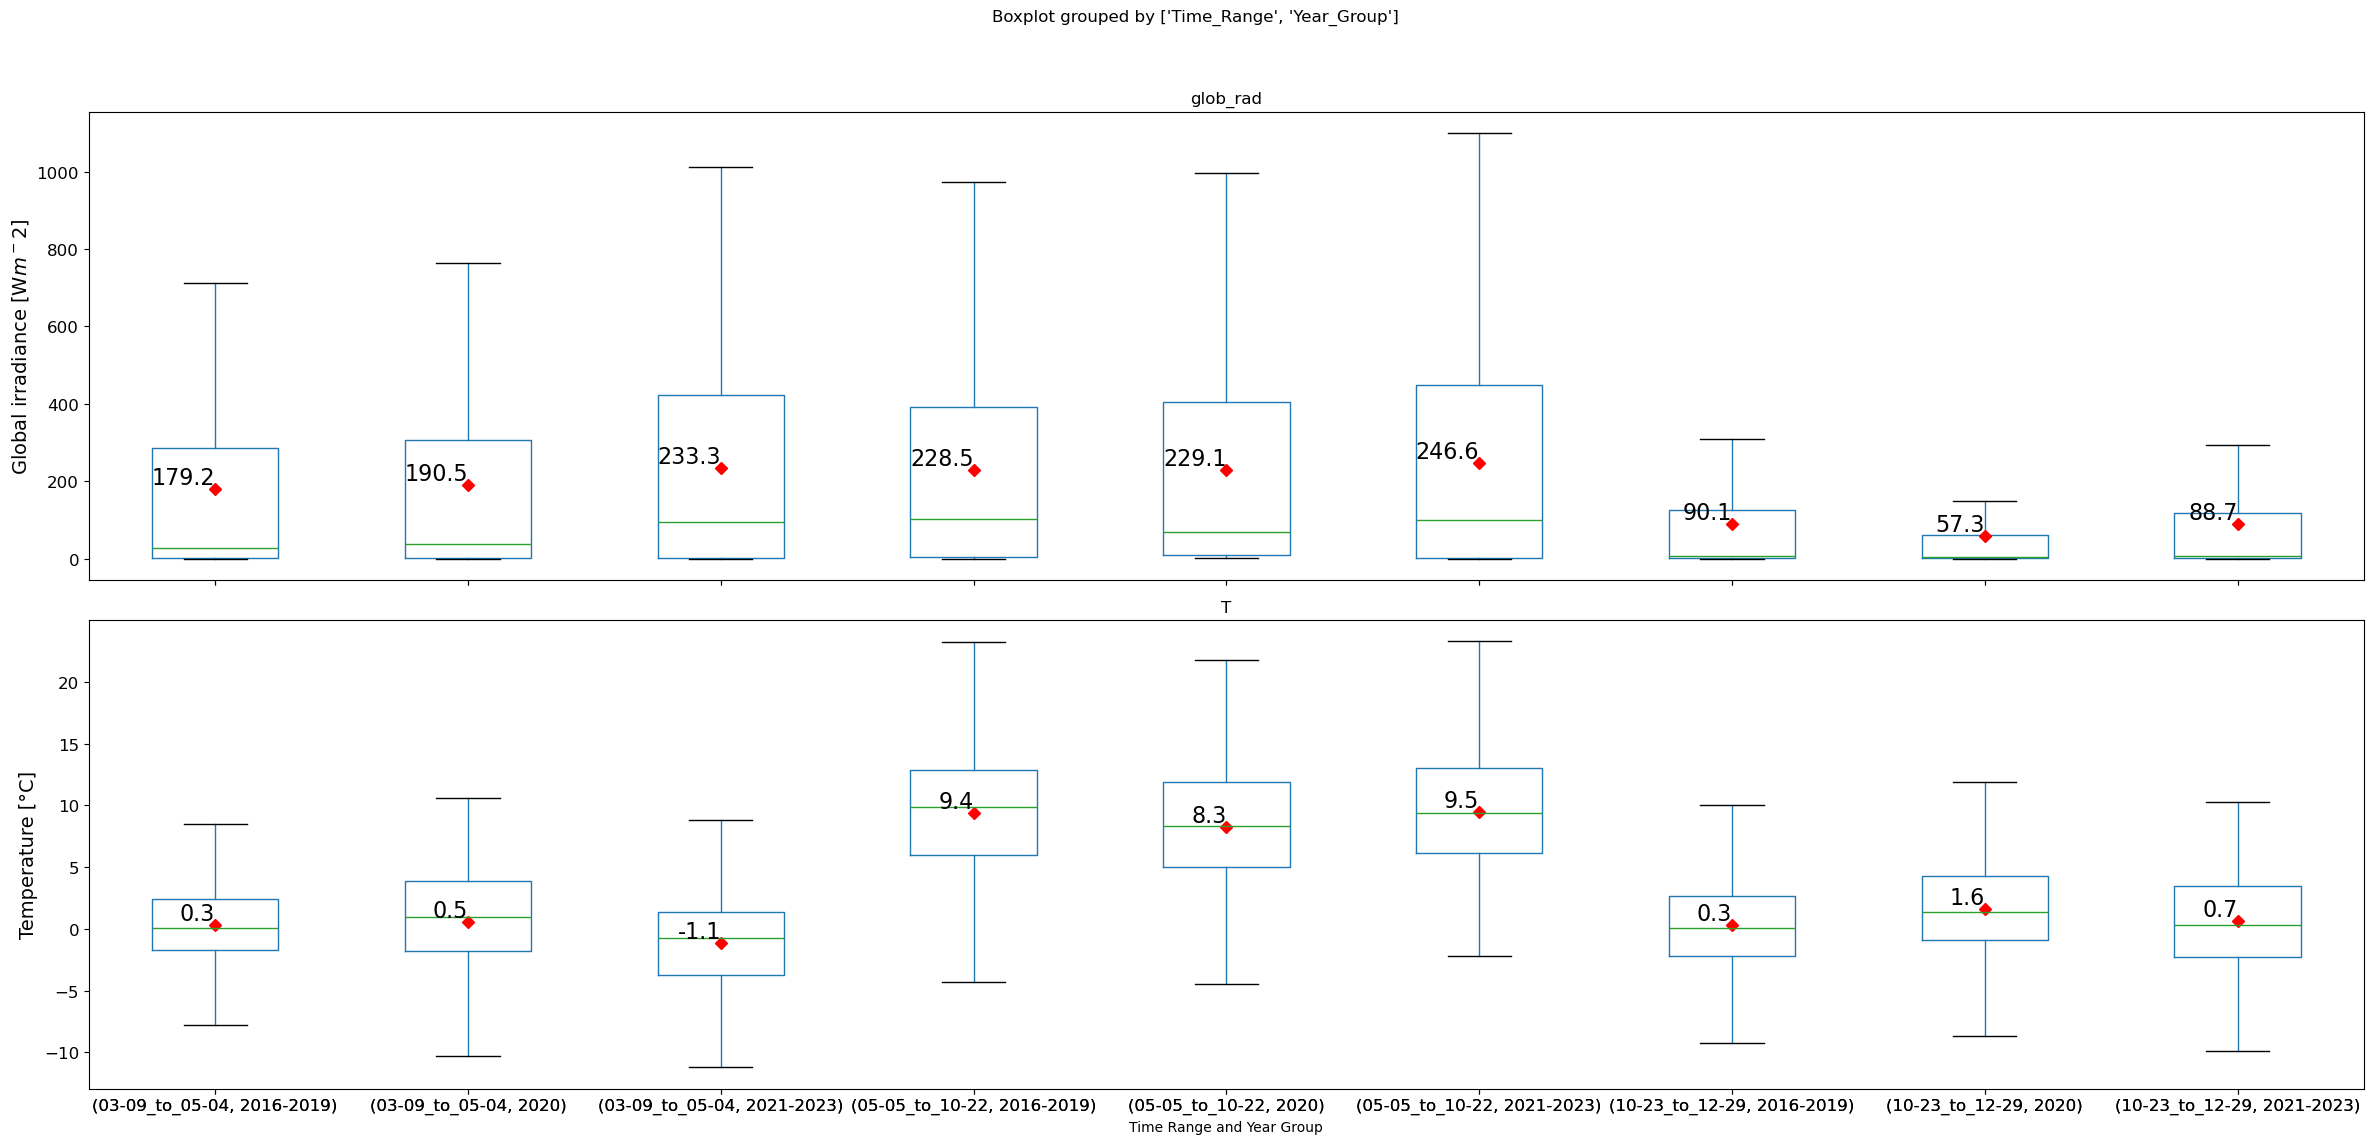

In [39]:
#Meteo conditions during I lockdown (LD), Mild restictions and II lockdown 

# Define function to assign custom time ranges based on month-day
def assign_time_range(month_day):
    for label, (start, end) in time_ranges.items():
        if start <= month_day <= end:
            return label
    return None

df['Time_Range'] = df['MonthDay'].apply(assign_time_range)

# Filter to only include relevant years and ranges
df = df.dropna(subset=['Year_Group', 'Time_Range'])

# Initialize the figure with one column and four rows
fig, axes = plt.subplots(2, 1, figsize=(24, 12), sharex=True)

# List of variables, titles, and respective units
variables = ['glob_rad', 'T']
titles = ['Global irradiance', 'Temperature']
#xlables = ['3/9-5/4 2016-2019', 'I LD 2020', '3/9-5/4 2021-2023', '5/5-10/22 2016-2019', 
          # 'Mild measures 2020', '5/5-10/22 2021-2023','10/23-12/29 2015-2019', 'II LD 2020', '10/23-12/29 2021-2023' ]
units=['[W$m^-2$]', '[°C]']

# Plot boxplots for each variable
for i, (var, unit) in enumerate(zip(variables, units)):
    
    period_means = df.groupby(['Time_Range', 'Year_Group'])[var].mean()
     # Calculate mean values for each Time_Range and Year_Group combination
    
    # Create boxplot for each time range and year group combination
    df.boxplot(column=var, by=['Time_Range', 'Year_Group'], ax=axes[i], grid=False, showfliers=False)
    #axes[i].set_title(f"{titles[i]}")
    axes[i].set_ylabel(f"{titles[i]} {unit}", fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)
    axes[i].set_xlabel("")  # Remove x-axis label for clarity

# Overlay mean values as red diamonds and annotate each mean
    for (time_range, year_group), mean_value in period_means.items():
        # Get the x-coordinate for each (Time_Range, Year_Group) combination
        x_coord = list(period_means.index).index((time_range, year_group)) + 1  # Boxplot positions start at 1
        axes[i].plot(x_coord, mean_value, 'rD')  # Red diamond marker
        axes[i].text(x_coord, mean_value, f'{mean_value:.1f}', color='black', ha='right', va='bottom', fontsize=16)

# Add a main title and adjust layout
#plt.suptitle("Distribution of Meteorological Variables by Custom Time and Year Ranges", fontsize=16)
plt.xlabel("Time Range and Year Group")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.savefig("C:\\YEAR1\\NMVOC\\code\\figures\\meteo_Covid_T_irr.png", dpi=300)
plt.show()

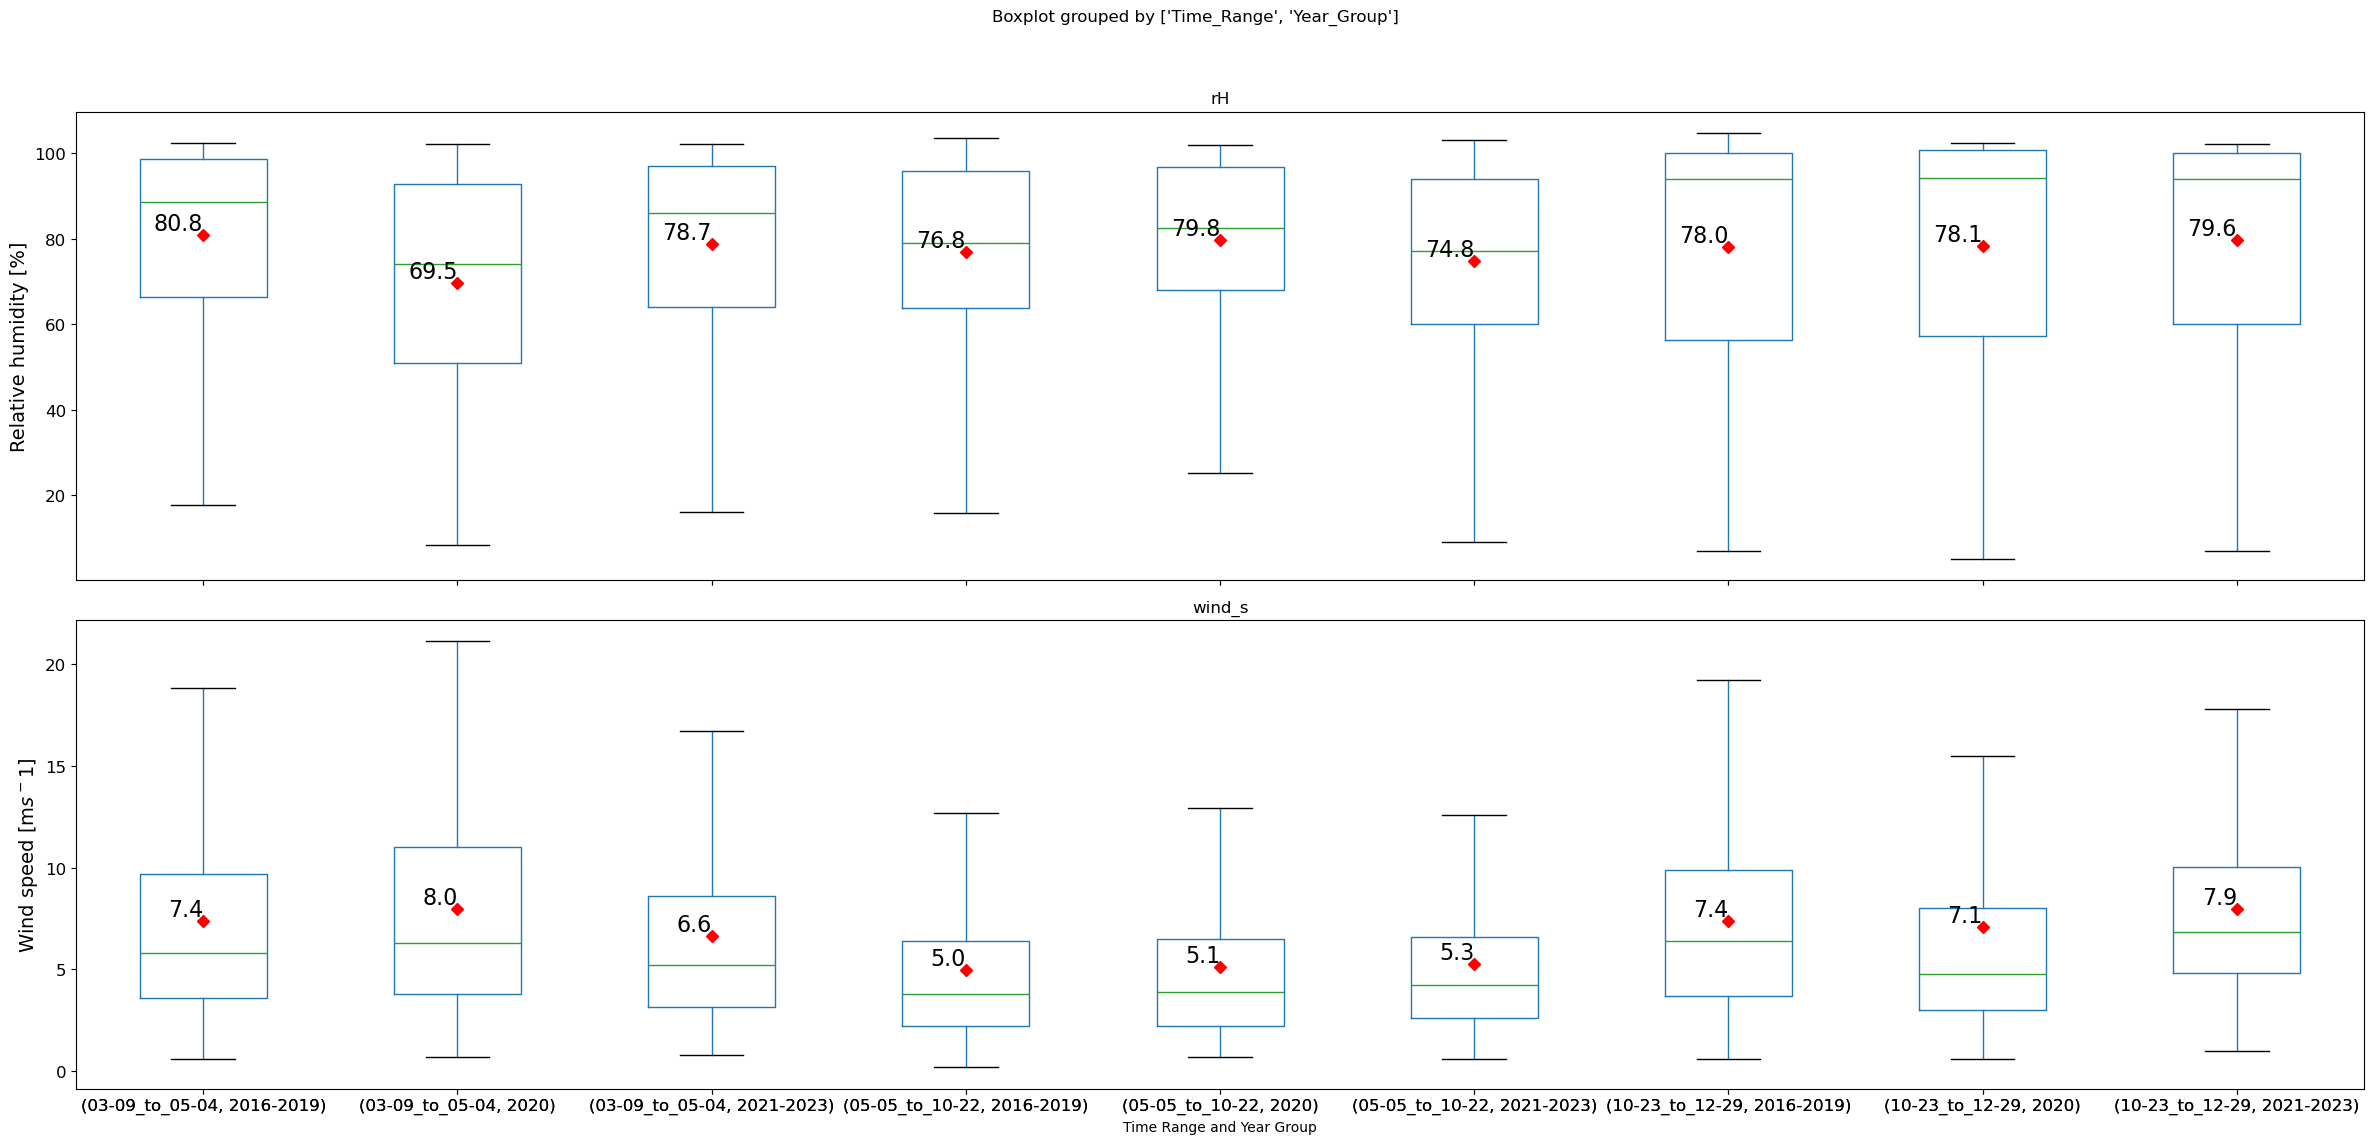

In [41]:
#Meteo conditions during I lockdown (LD), Mild restictions and II lockdown 

# Define function to assign custom time ranges based on month-day
def assign_time_range(month_day):
    for label, (start, end) in time_ranges.items():
        if start <= month_day <= end:
            return label
    return None

df['Time_Range'] = df['MonthDay'].apply(assign_time_range)

# Filter to only include relevant years and ranges
df = df.dropna(subset=['Year_Group', 'Time_Range'])

# Initialize the figure with one column and four rows
fig, axes = plt.subplots(2, 1, figsize=(24, 12), sharex=True)

# List of variables, titles, and respective units
variables = ['rH', 'wind_s']
titles = ['Relative humidity', 'Wind speed']
#xlables = ['3/9-5/4 2016-2019', 'I LD 2020', '3/9-5/4 2021-2023', '5/5-10/22 2016-2019', 
          # 'Mild measures 2020', '5/5-10/22 2021-2023','10/23-12/29 2015-2019', 'II LD 2020', '10/23-12/29 2021-2023' ]
units=['[%]','[m$s^-1$]']

# Plot boxplots for each variable
for i, (var, unit) in enumerate(zip(variables, units)):
    
    period_means = df.groupby(['Time_Range', 'Year_Group'])[var].mean()
     # Calculate mean values for each Time_Range and Year_Group combination
    
    # Create boxplot for each time range and year group combination
    df.boxplot(column=var, by=['Time_Range', 'Year_Group'], ax=axes[i], grid=False, showfliers=False)
    #axes[i].set_title(f"{titles[i]}")
    axes[i].set_ylabel(f"{titles[i]} {unit}", fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)
    axes[i].set_xlabel("")  # Remove x-axis label for clarity

# Overlay mean values as red diamonds and annotate each mean
    for (time_range, year_group), mean_value in period_means.items():
        # Get the x-coordinate for each (Time_Range, Year_Group) combination
        x_coord = list(period_means.index).index((time_range, year_group)) + 1  # Boxplot positions start at 1
        axes[i].plot(x_coord, mean_value, 'rD')  # Red diamond marker
        axes[i].text(x_coord, mean_value, f'{mean_value:.1f}', color='black', ha='right', va='bottom', fontsize=16)

# Add a main title and adjust layout
#plt.suptitle("Distribution of Meteorological Variables by Custom Time and Year Ranges", fontsize=16)
plt.xlabel("Time Range and Year Group")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.savefig("C:\\YEAR1\\NMVOC\\code\\figures\\meteo_Covid_Ws_RH.png", dpi=300)
plt.show()

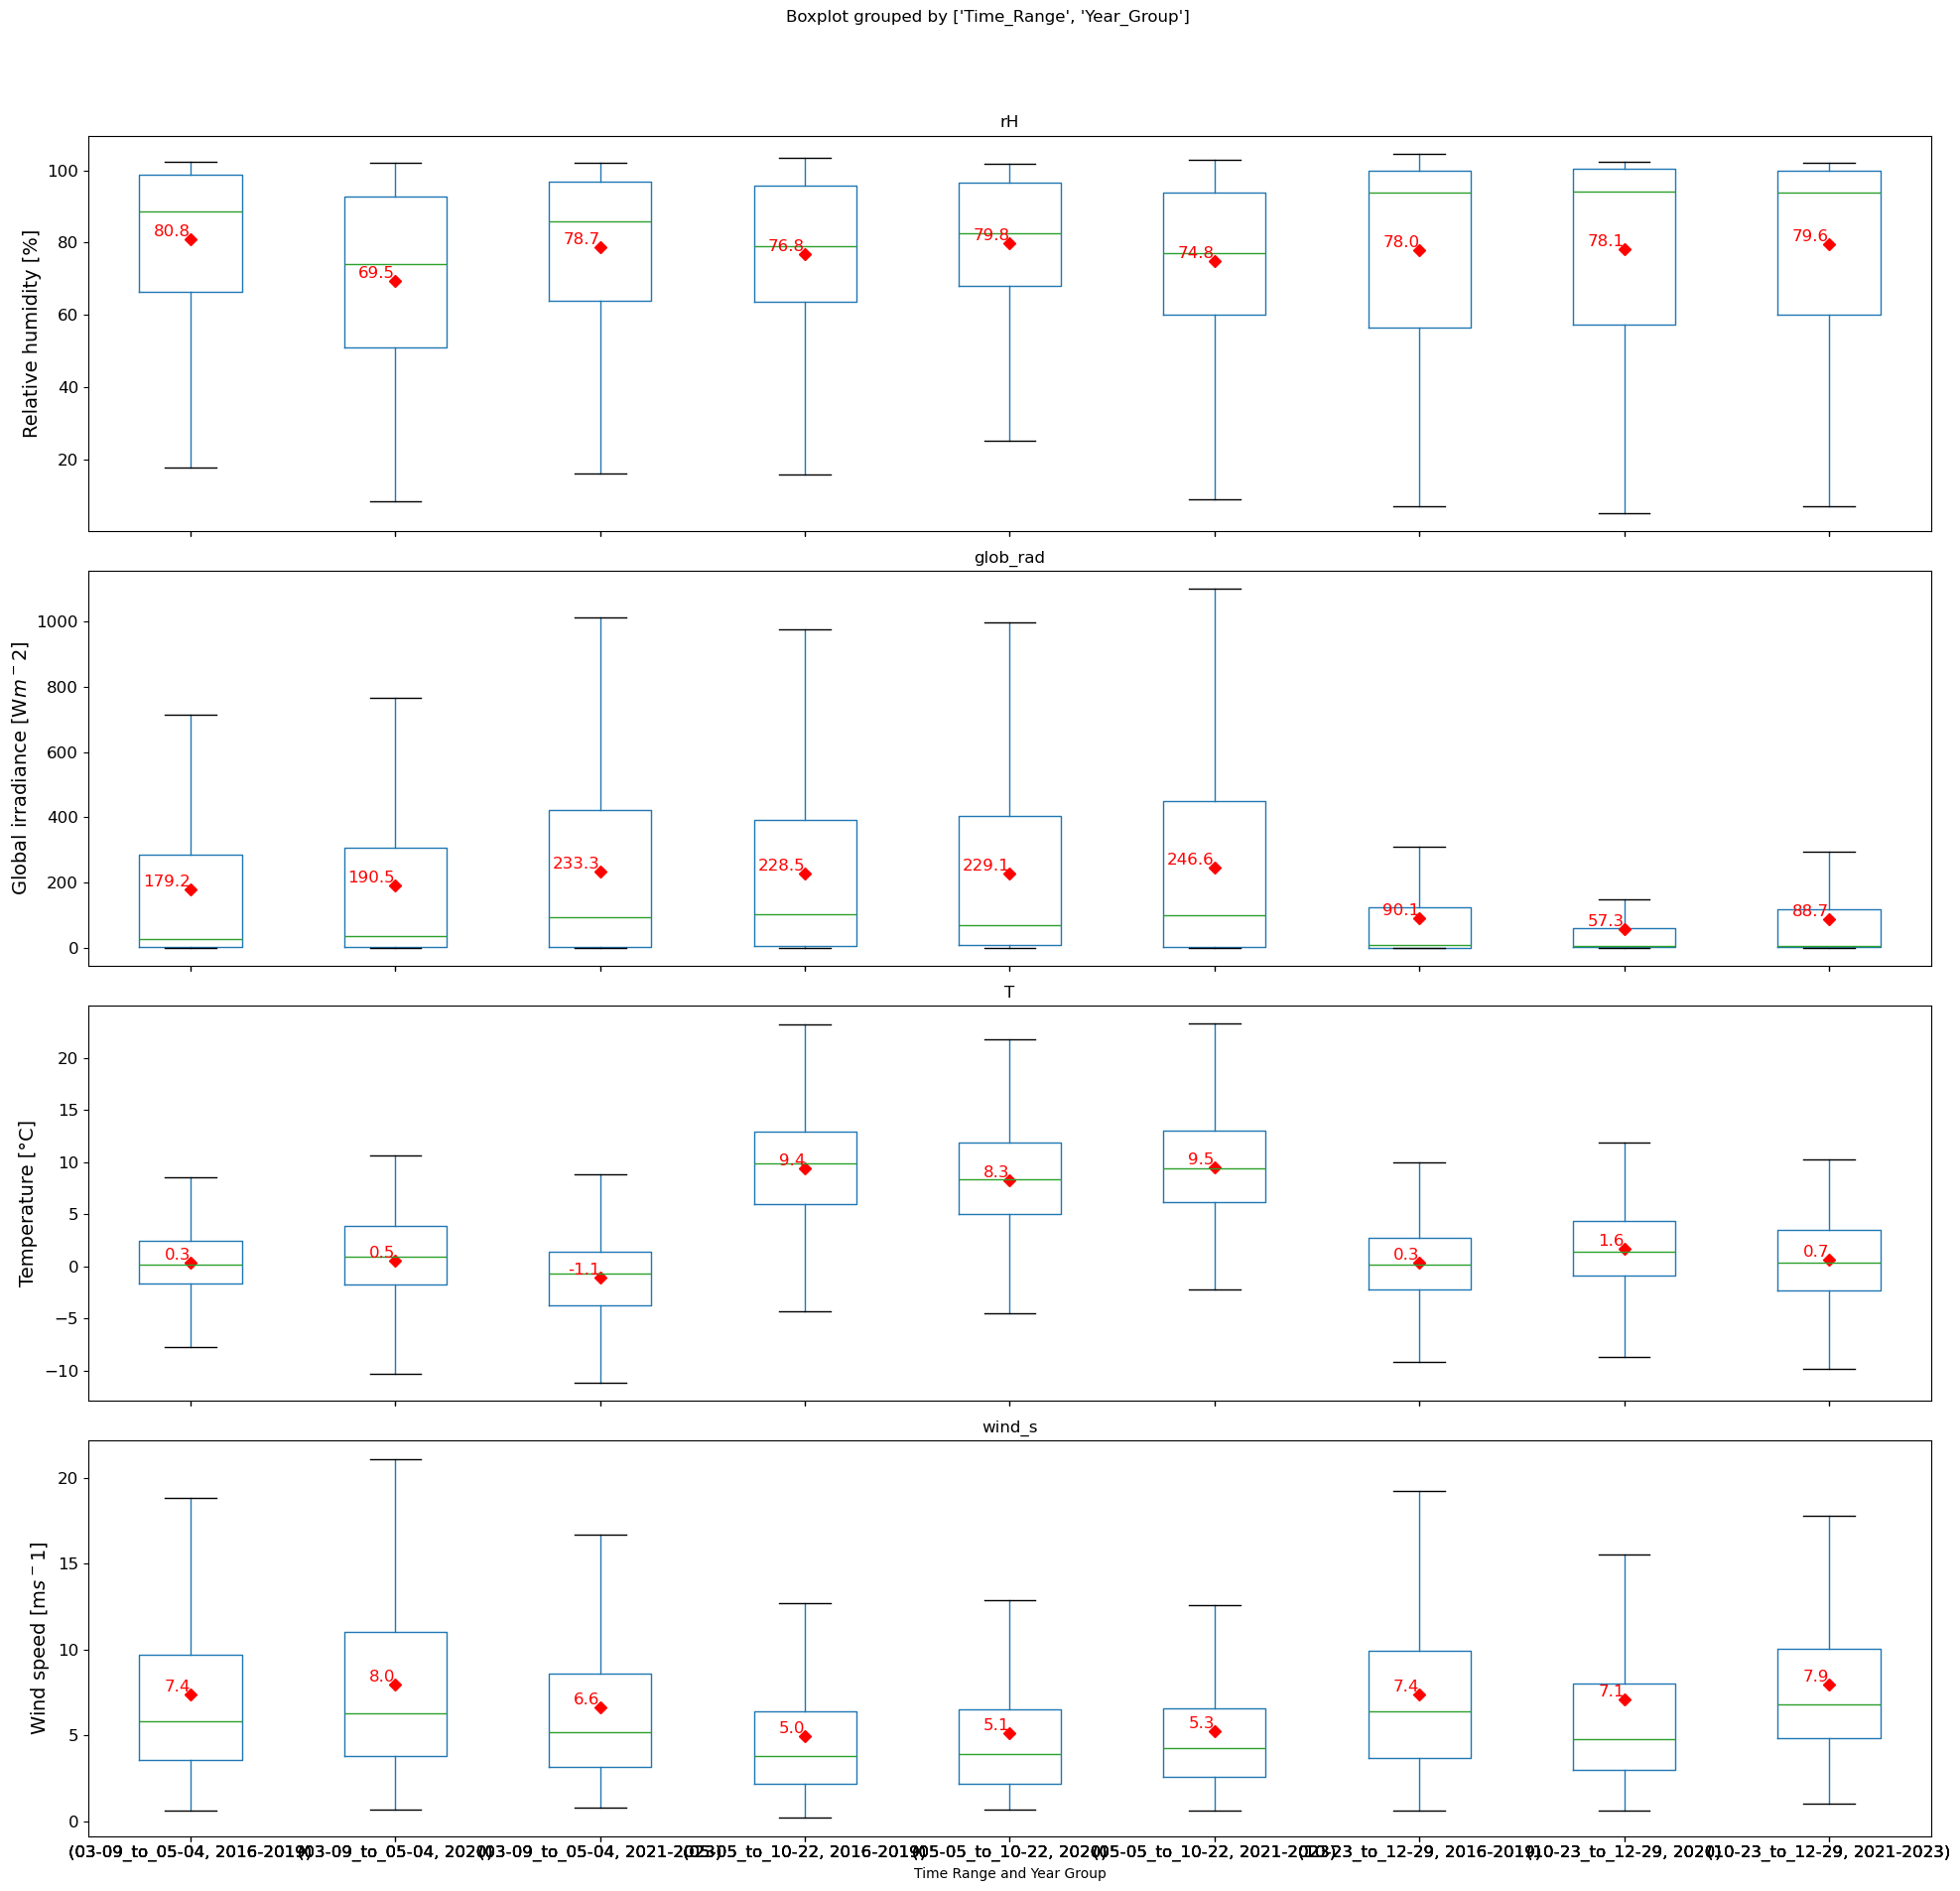

In [14]:
#Meteo conditions during I lockdown (LD), Mild restictions and II lockdown 

# Define function to assign custom time ranges based on month-day
def assign_time_range(month_day):
    for label, (start, end) in time_ranges.items():
        if start <= month_day <= end:
            return label
    return None

df['Time_Range'] = df['MonthDay'].apply(assign_time_range)

# Filter to only include relevant years and ranges
df = df.dropna(subset=['Year_Group', 'Time_Range'])

# Initialize the figure with one column and four rows
fig, axes = plt.subplots(4, 1, figsize=(20, 20), sharex=True)

# List of variables, titles, and respective units
variables = ['rH', 'glob_rad', 'T','wind_s']
titles = ['Relative humidity', 'Global irradiance', 'Temperature', 'Wind speed']
units=['[%]', '[W$m^-2$]', '[°C]','[m$s^-1$]']

# Plot boxplots for each variable
for i, (var, unit) in enumerate(zip(variables, units)):
    
    period_means = df.groupby(['Time_Range', 'Year_Group'])[var].mean()
     # Calculate mean values for each Time_Range and Year_Group combination
    
    # Create boxplot for each time range and year group combination
    df.boxplot(column=var, by=['Time_Range', 'Year_Group'], ax=axes[i], grid=False, showfliers=False)
    #axes[i].set_title(f"{titles[i]}")
    axes[i].set_xlabel('')  # Remove x-axis label for clarity
    axes[i].set_ylabel(f"{titles[i]} {unit}", fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)

# Overlay mean values as red diamonds and annotate each mean
    for (time_range, year_group), mean_value in period_means.items():
        # Get the x-coordinate for each (Time_Range, Year_Group) combination
        x_coord = list(period_means.index).index((time_range, year_group)) + 1  # Boxplot positions start at 1
        axes[i].plot(x_coord, mean_value, 'rD')  # Red diamond marker
        axes[i].text(x_coord, mean_value, f'{mean_value:.1f}', color='red', ha='right', va='bottom', fontsize=12)

# Add a main title and adjust layout
#plt.suptitle("Distribution of Meteorological Variables by Custom Time and Year Ranges", fontsize=16)
plt.xlabel("Time Range and Year Group")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.savefig("C:\\YEAR1\\NMVOC\\code\\figures\\meteo_Covid_boxplots.png", dpi=300)
plt.show()

In [43]:
df['MonthDay'] = df['date'].dt.strftime('%m-%d')

# Define the three time ranges
time_range_1 = ('03-09', '05-04')
time_range_2 = ('05-05', '10-22')
time_range_3 = ('10-23', '12-29')

# Filter data for each time range
range_1_data = df[(df['MonthDay'] >= time_range_1[0]) & (df['MonthDay'] <= time_range_1[1])]
range_2_data = df[(df['MonthDay'] >= time_range_2[0]) & (df['MonthDay'] <= time_range_2[1])]
range_3_data = df[(df['MonthDay'] >= time_range_3[0]) & (df['MonthDay'] <= time_range_3[1])]

In [42]:
#To generate boxplots for the three time periods for the year 2020 and compare them with the time range 2011-2019, 2020, 2021-2023
# Extract year, month, and day from 'Date'


# Separate 2020, 2011-2019, and 2021, 2022-2023 data for each time range
def get_year_split(data):
    data_2020 = data[data['year'] == 2020]
    data_2016_2019 = data[(data['year'] >= 2016) & (data['year'] <= 2019)]
    data_2021_2023 = data[(data['year'] >= 2021) & (data['year'] <= 2023)]
    return data_2020, data_2021_2023, data_2016_2019

range_1_2020,  range_1_2021_2023, range_1_2016_2019  = get_year_split(range_1_data)
range_2_2020, range_2_2021_2023, range_2_2016_2019 = get_year_split(range_2_data)
range_3_2020, range_3_2021_2023,range_3_2016_2019 = get_year_split(range_3_data)

NameError: name 'range_1_data' is not defined

In [137]:

# Add a 'Period' column to distinguish among 2020,  2021-2023 and 2016-2019
range_1_2016_2019['Period'] = '2016-2019'
range_1_2020['Period'] = '2020'
range_1_2021_2023['Period'] = '2021-2023'
range_2_2016_2019['Period'] = '2016-2019'
range_2_2020['Period'] = '2020'
range_2_2021_2023['Period'] = '2021-2023'
range_3_2016_2019['Period'] = '2016-2019'
range_3_2020['Period'] = '2020'
range_3_2021_2023['Period'] = '2021-2023'


# Combine the data for each time range
range_1_combined = pd.concat([range_1_2016_2019,range_1_2020,range_1_2021_2023])
range_2_combined = pd.concat([range_2_2016_2019,range_2_2020, range_2_2021_2023])
range_3_combined = pd.concat([range_3_2016_2019, range_3_2020,range_3_2021_2023 ])

C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_15652\541025296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range_1_2016_2019['Period'] = '2016-2019'
C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_15652\541025296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range_1_2020['Period'] = '2020'
C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_15652\541025296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [139]:
range_3_combined

,wind_s,starttime_dt,rH,T,glob_rad,hour,dayofyear,month,year,date,MonthDay,Period
starttime_dt,,,,,,,,,,,,
2016-10-23 00:00:00.000000,6.80,2016-10-23 00:00:00,95.7,-0.20,0.00,0,297,10,2016,2016-10-23,10-23,2016-2019
2016-10-23 01:00:00.028800,6.20,2016-10-23 01:00:00,95.3,0.10,0.00,1,297,10,2016,2016-10-23,10-23,2016-2019
2016-10-23 01:59:59.971200,6.00,2016-10-23 02:00:00,89.3,0.20,0.00,1,297,10,2016,2016-10-23,10-23,2016-2019
2016-10-23 03:00:00.000000,5.90,2016-10-23 03:00:00,85.1,0.50,0.00,3,297,10,2016,2016-10-23,10-23,2016-2019
2016-10-23 04:00:00.028800,4.90,2016-10-23 04:00:00,84.6,0.70,4.30,4,297,10,2016,2016-10-23,10-23,2016-2019
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 19:00:00.028800,7.18,2023-12-29 19:00:00,100.0,-0.53,27.72,19,363,12,2023,2023-12-29,12-29,2021-2023
2023-12-29 19:59:59.971200,6.82,2023-12-29 20:00:00,100.0,-0.42,5.66,19,363,12,2023,2023-12-29,12-29,2021-2023
2023-12-29 21:00:00.000000,8.78,2023-12-29 21:00:00,100.0,-0.34,0.39,21,363,12,2023,2023-12-29,12-29,2021-2023


KeyError: 'Period'

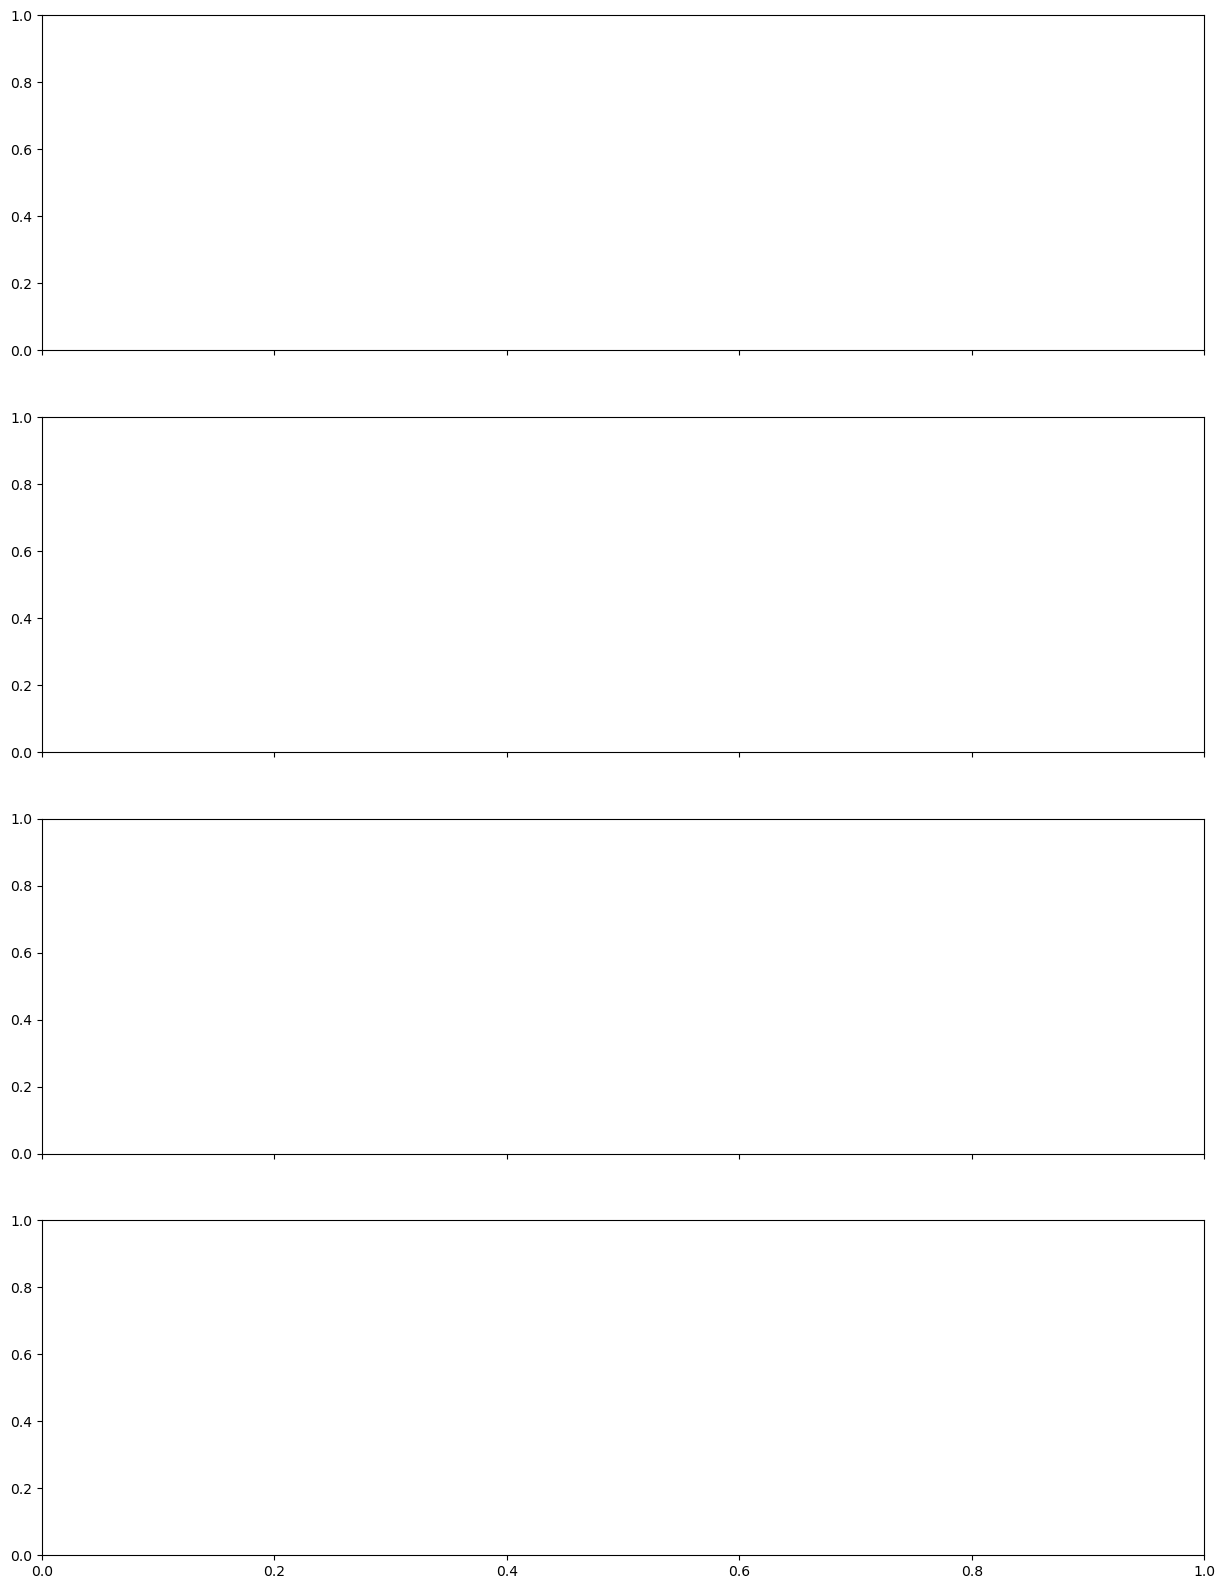

In [138]:
# Initialize the figure with one column and four rows
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# List of variables and their labels for the plots
variables = ['rH', 'glob_rad', 'T','wind_s']
titles = ['Relative humidity', 'Global irradiance', 'Temperature', 'Wind speed']
units=['[%]', '[W$m^-2$]', '[°C]','[m$s^-1$]']
# Create boxplots for each variable
for i, (var, unit) in enumerate(zip(variables, units)):
      # Calculate the mean for each month
    monthly_means = df.groupby('Period')[var].mean()
    
    # Group by month and plot
    df.boxplot(column=var, by='Period', ax=axes[i], grid=False, showfliers=False)
    #axes[i].set_title(titles[i])
    axes[i].set_title('')
    axes[i].set_xlabel('')  # Remove x-axis label for clarity
    axes[i].set_ylabel(f'{titles[i]} {unit}', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)
    # Overlay mean values as red diamonds and annotate each mean
    axes[i].plot(monthly_means.index, monthly_means.values, 'rD')  # Red diamond markers
    for month, mean_value in monthly_means.items():
        axes[i].text(month, mean_value, f'{mean_value:.1f}', color='black', ha='right', va='bottom', fontsize=12)

# Add a main title and adjust layout
plt.suptitle("Monthly Distribution of Meteorological Variables (2016-2023)", fontsize=16)
plt.xlabel("Month")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.savefig("C:\\YEAR1\\NMVOC\\code\\figures\\meteo_Covid.png", dpi=300)
plt.show()



In [ ]:
#view dimension of datset
wind_s_df.shape
#preview dataset
wind_s_df.head()
wind_s_df.info()

In [ ]:
wind_s_df[starttime_dt] = datetime.strptime(Month, '%YYYY%mm').date()
month = wind_s_df[starttime_dt].month # this is an int, you can easily subtract it
print (wind_s_df[starttime_dt].month)

In [ ]:

#convert starttime to stribg
wind_s_df_starttime_dt=wind_s_df["starttime_dt"].astype('string')
datee = datetime.datetime.strptime(wind_s_df_starttime_dt, "%Y-%m-%d")


datee.month
Out[9]: 1

In [ ]:


wind_s_df_starttime_dt=wind_s_df["starttime_dt"].astype('string')
print(wind_s_df_starttime_dt)